# Actividad 5 Aprendizaje no supervisado - Clustering

## 5.1 Problema I

Se pide agrupar un total de 8 patrones bidimensionales en tres clusters (𝑘=3). Los patrones son los siguientes: A1 (2,10), A2(2,5), A3(8,4), A4(5,8), A5(7,5), A6(6,4), A7(1,2) y A8(4,9). Los centroides iniciales son los puntos A1, A3 y A4. La métrica de distancia utilizada será la distancia euclídea

<img src="Screenshot_1.png">

### 5.1.1 Representar los clusters creados y la posición de los centroides después de cada iteración

In [1]:
# imports # NOTA: Entendi que habia que hacer 3 iteraciones, me di cuenta de que no demasiado tarde.
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
# funciones
def distancia_euclidiana(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def calcular_clusters(puntos, centros):
    clusters = {}
    for punto in puntos:
        distancias = []
        for centro in centros:
            dist = distancia_euclidiana(punto, centro)
            distancias.append(dist)
        print("Distancias del punto", punto, "a los clusters:", distancias)
        centro_mas_cercano = distancias.index(min(distancias))
        if centro_mas_cercano in clusters:
            clusters[centro_mas_cercano].append(punto)
        else:
            clusters[centro_mas_cercano] = [punto]

    for centro, puntos in clusters.items():
        print("Cluster: ", centros[centro], " Puntos del cluster: ", puntos)
    return clusters

# Definimmos la funcion para utilizarla mas adelante
def calcularGrafica(clusters):
    colores = ['red', 'blue', 'green']
    for centro, puntos in clusters.items():
        x, y = zip(*puntos)
        plt.scatter(x, y, color=colores[centro], label='Centro ' + str(centro+1))

        # Calcular el centroide del grupo
        centroid_x = sum([p[0] for p in puntos]) / len(puntos)
        centroid_y = sum([p[1] for p in puntos]) / len(puntos)
        plt.scatter(centroid_x, centroid_y, color='black', marker='x', label='Centros')
        # Calcular el radio máximo
        max_dist = max([distancia_euclidiana((centroid_x, centroid_y), p) for p in puntos])
    
        # Dibujar el círculo
        circle = Circle((centroid_x, centroid_y), max_dist, fill=False, color=colores[centro], linestyle='dashed')
        plt.gca().add_patch(circle)

    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Agrupación de puntos por centros')
    plt.legend()
    plt.axis('equal')
    plt.show()
    
# Casi que esto lo podria haber hecho antes de graficar y me ahorraba el coste computacional de hacerlo dos veces
def recalcular_centros(clusters):
    centros_reales = []
    for cluster in clusters.values():
        centroid_x = sum([p[0] for p in cluster]) / len(cluster)
        centroid_y = sum([p[1] for p in cluster]) / len(cluster)
        centros_reales.append((centroid_x, centroid_y))
    print(centros_reales)
    return centros_reales

In [3]:
# Calcular distancia de cada punto a cada cluster para la primera iteracion
# ACLARACION: Podria haber hecho todo en un bucle por iteraciones pero qureo que asi es mas grafico.

# Puntos:  A1 (2,10), A2(2,5), A3(8,4), A4(5,8), A5(7,5), A6(6,4), A7(1,2) y A8(4,9)
# Clusters (centros):  C1(2,10),  C2(8,4),  C3(5,8)

puntos = [(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)]
centros = [(2, 10), (8, 4), (5, 8)]
        
clusters = calcular_clusters(puntos, centros)

Distancias del punto (2, 10) a los clusters: [0.0, 8.48528137423857, 3.605551275463989]
Distancias del punto (2, 5) a los clusters: [5.0, 6.082762530298219, 4.242640687119285]
Distancias del punto (8, 4) a los clusters: [8.48528137423857, 0.0, 5.0]
Distancias del punto (5, 8) a los clusters: [3.605551275463989, 5.0, 0.0]
Distancias del punto (7, 5) a los clusters: [7.0710678118654755, 1.4142135623730951, 3.605551275463989]
Distancias del punto (6, 4) a los clusters: [7.211102550927978, 2.0, 4.123105625617661]
Distancias del punto (1, 2) a los clusters: [8.06225774829855, 7.280109889280518, 7.211102550927978]
Distancias del punto (4, 9) a los clusters: [2.23606797749979, 6.4031242374328485, 1.4142135623730951]
Cluster:  (2, 10)  Puntos del cluster:  [(2, 10)]
Cluster:  (5, 8)  Puntos del cluster:  [(2, 5), (5, 8), (1, 2), (4, 9)]
Cluster:  (8, 4)  Puntos del cluster:  [(8, 4), (7, 5), (6, 4)]


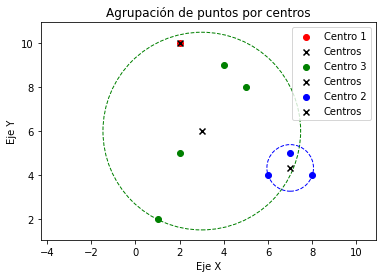

In [4]:
# Mostrammos de nuevo esta vez con los circulos definidos 
calcularGrafica(clusters)

In [5]:
# Recalcular centros para sa segunda iteracion
centros_actualizados = recalcular_centros(clusters)

[(2.0, 10.0), (3.0, 6.0), (7.0, 4.333333333333333)]


In [7]:
# Calcular distancia de cada punto a cada cluster para la segunda iteracion
clusters = calcular_clusters(puntos, centros_actualizados)

Distancias del punto (2, 10) a los clusters: [0.0, 4.123105625617661, 7.557189365836423]
Distancias del punto (2, 5) a los clusters: [5.0, 1.4142135623730951, 5.044248650140519]
Distancias del punto (8, 4) a los clusters: [8.48528137423857, 5.385164807134504, 1.0540925533894596]
Distancias del punto (5, 8) a los clusters: [3.605551275463989, 2.8284271247461903, 4.176654695380556]
Distancias del punto (7, 5) a los clusters: [7.0710678118654755, 4.123105625617661, 0.666666666666667]
Distancias del punto (6, 4) a los clusters: [7.211102550927978, 3.605551275463989, 1.0540925533894596]
Distancias del punto (1, 2) a los clusters: [8.06225774829855, 4.47213595499958, 6.437735971942655]
Distancias del punto (4, 9) a los clusters: [2.23606797749979, 3.1622776601683795, 5.547772325697746]
Cluster:  (2.0, 10.0)  Puntos del cluster:  [(2, 10), (4, 9)]
Cluster:  (3.0, 6.0)  Puntos del cluster:  [(2, 5), (5, 8), (1, 2)]
Cluster:  (7.0, 4.333333333333333)  Puntos del cluster:  [(8, 4), (7, 5), (6, 4

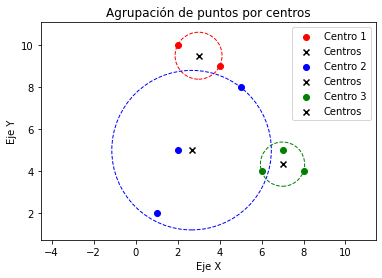

In [8]:
# Mostramos
calcularGrafica(clusters)

In [10]:
# Recalculamos centros
centros_actualizados = recalcular_centros(clusters)

[(3.0, 9.5), (2.6666666666666665, 5.0), (7.0, 4.333333333333333)]


In [11]:
# Calcular distancia de cada punto a cada cluster para la tercera iteracion
clusters = calcular_clusters(puntos, centros_actualizados)

Distancias del punto (2, 10) a los clusters: [1.118033988749895, 5.044248650140519, 7.557189365836423]
Distancias del punto (2, 5) a los clusters: [4.6097722286464435, 0.6666666666666665, 5.044248650140519]
Distancias del punto (8, 4) a los clusters: [7.433034373659253, 5.426273532033236, 1.0540925533894596]
Distancias del punto (5, 8) a los clusters: [2.5, 3.80058475033046, 4.176654695380556]
Distancias del punto (7, 5) a los clusters: [6.020797289396148, 4.333333333333334, 0.666666666666667]
Distancias del punto (6, 4) a los clusters: [6.264982043070834, 3.4801021696368504, 1.0540925533894596]
Distancias del punto (1, 2) a los clusters: [7.762087348130012, 3.431876713662333, 6.437735971942655]
Distancias del punto (4, 9) a los clusters: [1.118033988749895, 4.216370213557839, 5.547772325697746]
Cluster:  (3.0, 9.5)  Puntos del cluster:  [(2, 10), (5, 8), (4, 9)]
Cluster:  (2.6666666666666665, 5.0)  Puntos del cluster:  [(2, 5), (1, 2)]
Cluster:  (7.0, 4.333333333333333)  Puntos del cl

[(3.6666666666666665, 9.0), (1.5, 3.5), (7.0, 4.333333333333333)]


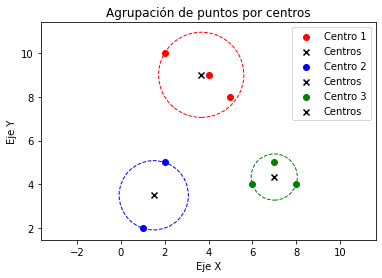

In [13]:
# No estoy seguro de si esto corresponbderia a esta iteracion o si ya seria de la siguiente (ya que esto afectara al SSE)
centros_actualizados = recalcular_centros(clusters) 
# Mostramos
calcularGrafica(clusters)

### 5.1.2 El valor de la métrica SSE

In [14]:
# SSE = suma de las distacias de cada punto a su cluster al cuadrado
sse_total = 0
for centrovar, puntosvar in clusters.items():
    centro_cluster = centros_actualizados[centrovar]
    for puntovar in puntosvar:
        dist = distancia_euclidiana(puntovar, centro_cluster) 
        sse_total += dist ** 2 
        print(dist)

print("SSE total:", sse_total)

1.9436506316151
1.6666666666666667
0.3333333333333335
1.5811388300841898
1.5811388300841898
1.0540925533894596
0.666666666666667
1.0540925533894596
SSE total: 14.333333333333334


### 5.1.3 Comparar los resultados con los obtenidos en el ejemplo de la sección 2.3. del manual de la lección 5

Si no actualizaba los centros obtenia 21 de SSE, pero al actualizarlos he obtenido el mismo resultado que en el manual, lo cual tiene sentido si miramos las agrupaciones que se han realizado. (coinciden todas)

### 5.1.4 ¿Á que se debe la diferencia de resultados?

En el caso de no actualizar los centros esta se deberia a que las distancias a los centros anteriores eran mayores al no encontrarse en la posicion optima.

## 5.2 Problema II

Dada la siguiente matriz de distancias entre cinco patrones:

<img src="Screenshot_4.png">

### 5.2.1 Aplicar un clustering jerárquico con el método de enlace simple

In [18]:
# Calculamos los minimmos:
import numpy as np
matriz = np.array([[0, 1, 2, 9, 10],
                   [0, 0, 3, 7, 5],
                   [0, 0, 0, 4, 6],
                   [0, 0, 0, 0, 8],
                   [0, 0, 0, 0, 0]])

print(matriz)

[[ 0  1  2  9 10]
 [ 0  0  3  7  5]
 [ 0  0  0  4  6]
 [ 0  0  0  0  8]
 [ 0  0  0  0  0]]


In [35]:
def distancia_enlace_simple(cluster1, cluster2):
    min_dist = float('inf')
    for i in cluster1:
        for j in cluster2:
            dist = matriz[i][j]
            if dist < min_dist:
                min_dist = dist
    return min_dist

# Los nombrare con enteros para simplificar el proceso, con las letras es na pesadilla
clusters = [[0], [1], [2], [3], [4]] #[['A'], ['B'], ['C'], ['D'], ['E']]
print(clusters)

[[0], [1], [2], [3], [4]]


In [36]:
while len(clusters) > 1:
    min_dist = float('inf')
    min_indices = (0, 0)

    # Distancia minima
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dist = distancia_enlace_simple(clusters[i], clusters[j])
            if dist < min_dist:
                min_dist = dist
                min_indices = (i, j)

    print("Se fusionan los clusters ", clusters[min_indices[0]], " y ", clusters[min_indices[1]])
    merged_cluster = clusters[min_indices[0]] + clusters[min_indices[1]]
    del clusters[min_indices[1]]
    clusters[min_indices[0]] = merged_cluster


Se fusionan los clusters  [0]  y  [1]
Se fusionan los clusters  [0, 1]  y  [2]
Se fusionan los clusters  [0, 1, 2]  y  [3]
Se fusionan los clusters  [0, 1, 2, 3]  y  [4]


### 5.2.2 Aplicar un clustering jerárquico con el método de enlace completo

In [43]:
# Lo mismo que antes pero con maximos: 
# Inicializar los clusters como puntos individuales con índices enteros
clusters = [[0], [1], [2], [3], [4]]

def distancia_enlace_completo(cluster1, cluster2):
    max_dist = 0
    for i in cluster1:
        for j in cluster2:
            dist = matriz[i][j]
            if dist > max_dist:
                max_dist = dist
    return max_dist
distancias = []
while len(clusters) > 1:
    max_dist = 0
    max_indices = (0, 0)

    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dist = distancia_enlace_completo(clusters[i], clusters[j])
            if dist > max_dist:
                max_dist = dist
                max_indices = (i, j)

    print("Se fusionan los clusters ", clusters[max_indices[0]], " y ", clusters[max_indices[1]])
    merged_cluster = clusters[max_indices[0]] + clusters[max_indices[1]]
    del clusters[max_indices[1]]
    clusters[max_indices[0]] = merged_cluster
    distancias.append(max_dist)


Se fusionan los clusters  [0]  y  [4]
Se fusionan los clusters  [0, 4]  y  [3]
Se fusionan los clusters  [1]  y  [2]
Se fusionan los clusters  [0, 4, 3]  y  [1, 2]


### 5.2.3 ¿Se podría usar el método de enlace medio con estos datos? Justifica la respuesta

No se podria porque la matriz de distancias no esta completa de modo que faltarian datos para calcular el punto medio. Si consideraos que las distancias son simetricas, es decir que de A a B hay el mismo coste que de B a A entonces podriamos completar dicha matriz y ser capaces de utilizar este metodo.